<a href="https://colab.research.google.com/github/Chris12C/Chen123/blob/main/GANs_for_bubble_data_expasion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generative Adversarial Networks for Bubble Database Expansion

In this notebook, we build a pair of GANs.
- The dataset is a dataset of 3x3 black and grayscale images with blue base, where the images we want to generate are backwards diagonals 
- The goal for the GANs is to expand the database of images.
- Each image in this condition refers to a condition of bubble behavior in the pacific flow field.
- With this GANs we can generate more data of bubble behavior in the flow to expand the dataset for further nueral network training.

### Imports

In [ ]:
# Imports

import numpy as np
from numpy import random
from matplotlib import pyplot as plt
%matplotlib inline

### Plotting function

In [ ]:
# Drawing function

def view_samples(samples, m, n):
    fig, axes = plt.subplots(figsize=(10, 10), nrows=m, ncols=n, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples):
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(1-img.reshape((3,3)), cmap='Blues_r')  
    return fig, axes

# Examples of faces

In the video, we've defined the faces as backwards diagonals. Here are some examples.

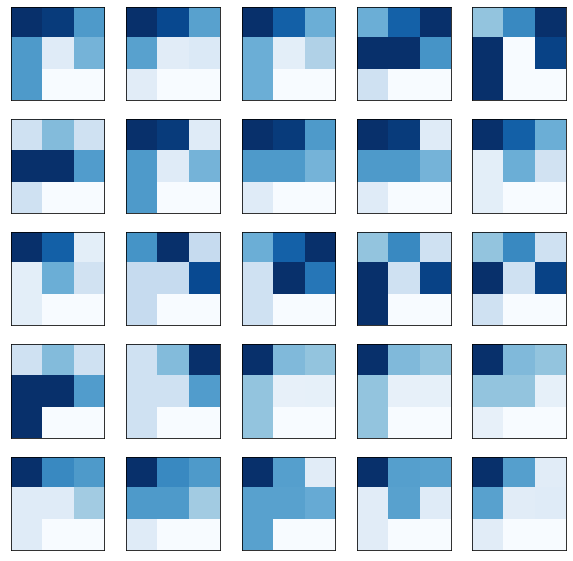

In [ ]:
# Examples of faces
faces = [np.array([0.85,0.813,0.5,0.5,0.1,0.403,0.5,0,0]),
         np.array([0.9,0.813,0.5,0.5,0.1,0.126,0.1,0,0]),
         np.array([1,0.813,0.5,0.5,0.1,0.317,0.5,0,0]),
         np.array([0.25,0.406,0.5,0.5,0.5,0.306,0.1,0,0]),
         np.array([0.2,0.329,0.5,0.5,0,0.464,0.5,0,0]),
         np.array([0.1,0.219,0.1,0.5,0.5,0.289,0.1,0,0]),
          np.array([0.85,0.813,0.1,0.5,0.1,0.403,0.5,0,0]),
          np.array([0.85,0.813,0.5,0.5,0.5,0.403,0.1,0,0]),
          np.array([0.85,0.813,0.1,0.5,0.5,0.403,0.1,0,0]),
          np.array([1,0.813,0.5,0.1,0.5,0.192,0.1,0,0]),
          np.array([1,0.813,0.1,0.1,0.5,0.192,0.1,0,0]),
          np.array([0.25,0.406,0.1,0.1,0.1,0.365,0.1,0,0]),
          np.array([0.25,0.406,0.5,0.1,0.5,0.365,0.1,0,0]),
          np.array([0.2,0.329,0.1,0.5,0.1,0.464,0.5,0,0]),
          np.array([0.2,0.329,0.1,0.5,0.1,0.464,0.1,0,0]),
          np.array([0.1,0.219,0.1,0.5,0.5,0.289,0.5,0,0]),
          np.array([0.1,0.219,0.5,0.1,0.1,0.289,0.1,0,0]),
          np.array([1.25,0.559,0.5,0.5,0.1,0.107,0.5,0,0]), 
          np.array([1.25,0.559,0.5,0.5,0.1,0.107,0.5,0,0]),
          np.array([1.25,0.559,0.5,0.5,0.5,0.107,0.1,0,0]),
          np.array([0.85,0.559,0.5,0.1,0.1,0.306,0.1,0,0]),
          np.array([0.85,0.559,0.5,0.5,0.5,0.306,0.1,0,0]), 
         np.array([0.9,0.508,0.1,0.5,0.5,0.464,0.5,0,0]),
         np.array([0.9,0.508,0.5,0.1,0.5,0.107,0.1,0,0]),
         np.array([0.9,0.508,0.1,0.5,0.1,0.107,0.1,0,0])]
         
_ = view_samples(faces, 5, 5)

# Examples of noise
The following are randomly generated images, which don't correspond to faces.

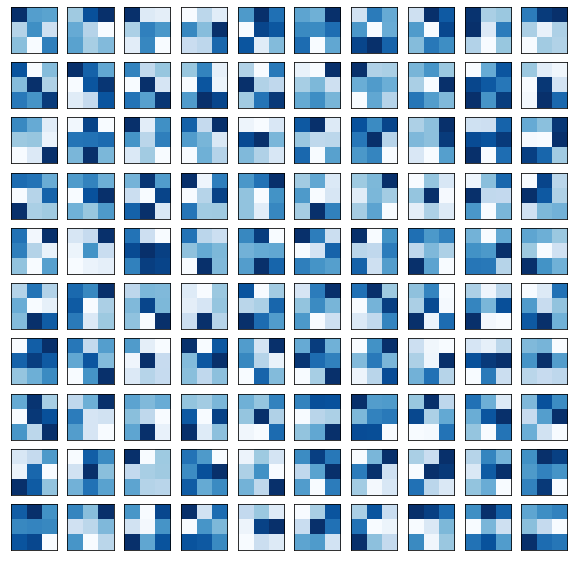

In [ ]:
# Examples of noisy images
noise = [np.random.randn(3,3) for i in range(100)]
def generate_random_image():
    return [np.random.random(), np.random.random(), np.random.random(), np.random.random()]

_ = view_samples(noise, 10,10)

# Building the neural networks

In [ ]:
# The sigmoid activation function
def sigmoid(x):
    return np.exp(x)/(1.0+np.exp(x))

## The Discriminator

<img src="discriminator_math.png" />

In [ ]:
class Discriminator():
    def __init__(self):
        #self.weights = np.array([0.0 for i in range(4)])
        #self.bias = 0.0
        self.weights = np.array([np.random.normal() for i in range(9)])
        self.bias = np.random.normal()
    
    def forward(self, x):
        # Forward pass
        return sigmoid(np.dot(x, self.weights) + self.bias)
    
    def error_from_image(self, image):
        prediction = self.forward(image)
        # We want the prediction to be 1, so the error is -log(prediction)
        return -np.log(prediction)
    
    def derivatives_from_image(self, image):
        prediction = self.forward(image)
        derivatives_weights = -image * (1-prediction)
        derivative_bias = -(1-prediction)
        return derivatives_weights, derivative_bias
    
    def update_from_image(self, x):
        ders = self.derivatives_from_image(x)
        self.weights -= learning_rate * ders[0]
        self.bias -= learning_rate * ders[1]

    def error_from_noise(self, noise):
        prediction = self.forward(noise)
        # We want the prediction to be 0, so the error is -log(1-prediction)
        return -np.log(1-prediction)
    
    def derivatives_from_noise(self, noise):
        prediction = self.forward(noise)
        derivatives_weights = noise * prediction
        derivative_bias = prediction
        return derivatives_weights, derivative_bias
    
    def update_from_noise(self, noise):
        ders = self.derivatives_from_noise(noise)
        self.weights -= learning_rate * ders[0]
        self.bias -= learning_rate * ders[1]

## The Generator
<img src="generator_math.png" />

In [ ]:
class Generator():
    def __init__(self):
        self.weights = np.array([np.random.normal() for i in range(9)])
        self.biases = np.array([np.random.normal() for i in range(9)])

    def forward(self, z):
        # Forward pass
        return sigmoid(z * self.weights + self.biases)

    def error(self, z, discriminator):
        x = self.forward(z)
        # We want the prediction to be 0, so the error is -log(1-prediction)
        y = discriminator.forward(x)
        return -np.log(y)

    def derivatives(self, z, discriminator):
        discriminator_weights = discriminator.weights
        discriminator_bias = discriminator.bias
        x = self.forward(z)
        y = discriminator.forward(x)
        factor = -(1-y) * discriminator_weights * x *(1-x)
        derivatives_weights = factor * z
        derivative_bias = factor
        return derivatives_weights, derivative_bias

    def update(self, z, discriminator):
        error_before = self.error(z, discriminator)
        ders = self.derivatives(z, discriminator)
        self.weights -= learning_rate * ders[0]
        self.biases -= learning_rate * ders[1]
        error_after = self.error(z, discriminator)

# Training

In [ ]:
# Set random seed
np.random.seed(42)

# Hyperparameters
learning_rate = 0.01
epochs = 1500

# The GAN
D = Discriminator()
G = Generator()

# For the error plot
errors_discriminator = []
errors_generator = []

for epoch in range(epochs):
    
    for face in faces:
        
        # Update the discriminator weights from the real face
        D.update_from_image(face)
    
        # Pick a random number to generate a fake face
        z = random.rand()

        # Calculate the discriminator error
        errors_discriminator.append(sum(D.error_from_image(face) + D.error_from_noise(z)))
        
        # Calculate the generator error
        errors_generator.append(G.error(z, D))
        
        # Build a fake face
        noise = G.forward(z)
        
        # Update the discriminator weights from the fake face
        D.update_from_noise(noise)
    
        # Update the generator weights from the fake face
        G.update(z, D)

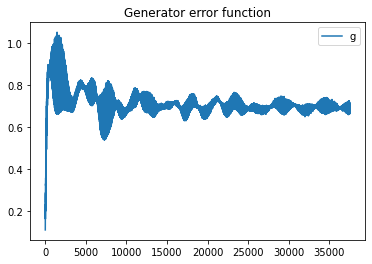

Text(0.5, 1.0, 'Discriminator error function')

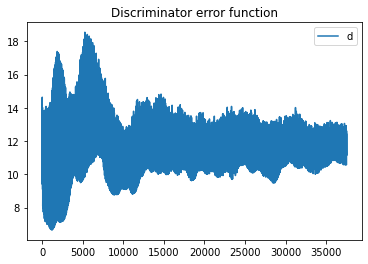

In [ ]:
import matplotlib.pyplot as plt
plt.plot(errors_generator)
plt.title("Generator error function")
plt.legend("gen")
plt.show()
plt.plot(errors_discriminator)
plt.legend('disc')
plt.title("Discriminator error function")

# Generating images

[0.67822315 0.49806112 0.37886546 0.48338734 0.35306211 0.29272362
 0.26877829 0.00210071 0.00180465]
[7.24606964e-01 3.74602331e-01 3.94387322e-01 3.04647900e-01
 2.29728816e-01 2.31688956e-01 1.65971584e-01 9.62814957e-04
 4.36540974e-04]
[0.66627222 0.52888979 0.37510562 0.52973743 0.3874991  0.30900721
 0.29927231 0.00254189 0.0025524 ]
[0.65189042 0.56497075 0.37068805 0.58372196 0.42960622 0.32884928
 0.33767371 0.00318275 0.00384094]
[0.70370346 0.43059625 0.38719066 0.38346884 0.28276168 0.25872832
 0.20898113 0.00138058 0.00084094]
[7.11682411e-01 4.09218409e-01 3.89895073e-01 3.52788891e-01
 2.61945755e-01 2.48309981e-01 1.91888449e-01 1.20539439e-03
 6.56985906e-04]
[0.6732988  0.51084565 0.37730589 0.50260199 0.36716864 0.29940919
 0.28117203 0.00227338 0.00208345]
[0.70363661 0.43077514 0.38716821 0.38372816 0.28293884 0.2588161
 0.20912779 0.00138213 0.00084267]
[7.19964728e-01 3.87019918e-01 3.92757208e-01 3.21673574e-01
 2.41074391e-01 2.37621368e-01 1.75024625e-01 1.04

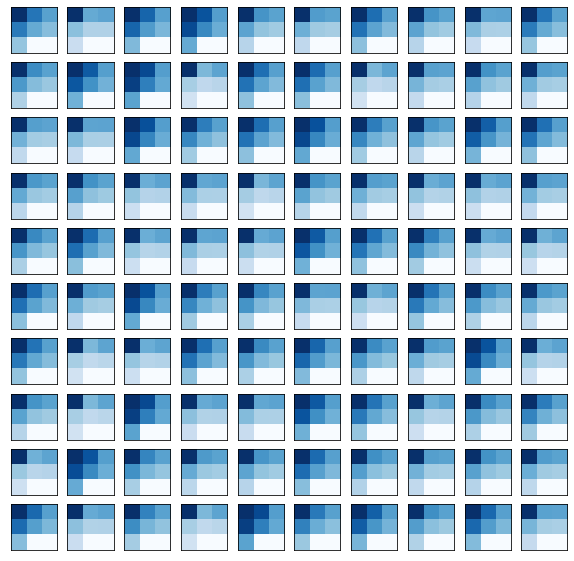

In [ ]:
generated_images = []
for i in range(100):
    z = random.random()
    generated_image = G.forward(z)
    generated_images.append(generated_image)
_ = view_samples(generated_images, 10, 10)
for i in generated_images:
    print(i)

# Studying the weights and biases of the Generator and Discriminator

In [ ]:
print("Generator weights", G.weights)
print("Generator biases", G.biases)

Generator weights [ 0.45953513 -1.04574237  0.13561434 -1.5720025  -1.2518168  -0.65592345
 -1.27125845 -1.6186658  -2.94311771]
Generator biases [ 0.5876614   0.35169896 -0.54098147  0.47387153 -0.17531755 -0.6567311
 -0.56385839 -5.60698941 -5.30394246]


In [ ]:
print("Discriminator weights", D.weights)
print("Discriminator bias", D.bias)

Discriminator weights [-0.05215561  0.13769971 -0.27919301  0.22558907 -0.02150789 -0.22710499
  0.18636659 -2.97827527 -3.40464341]
Discriminator bias 0.006930088378871457
